In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# Credible Intervals

## Objectives
+ Introduce the concept of credible intervals

## Credible Intervals

The posterior $p(\theta|x_{1:N})$ captures everything that we have to say about $\theta$.
Credible intervals are a way to summarize it.
A credible interval is basically an interval inside which the parameter $\theta$ lies with high probability.
Specifically, a 95\% credible interval $(\ell, u)$ (for lower and upper bounds) for $\theta$ is such that:

$$
p(\ell \le \theta \le u|x_{1:N}) = 0.95.
$$

Of course, there is not a unique credible interval.
You can move $(\ell, u)$ to the left or to the right in a way that keeps the probability contained in it at 0.95.

The *central credible interval* is particularly common.
It is defined by solving the following problems

$$
p(\theta \le \ell | x_{1:N}) = 0.025,
$$

and

$$
p(\theta \le u | x_{1:N}) = 0.975,
$$

for $\ell$ and $u$, respectively.

Let's use coin toss example to demonstrate this.

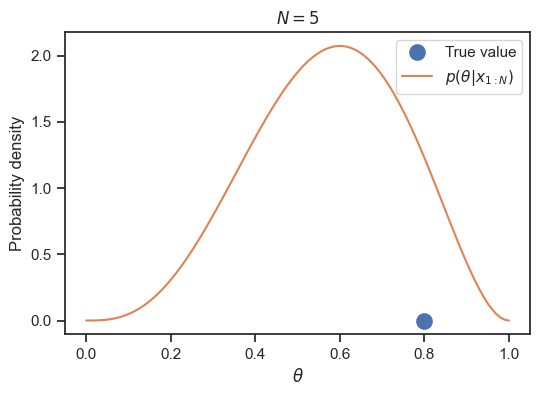

In [2]:
import scipy.stats as st

theta_true = 0.8
X = st.bernoulli(theta_true)

N = 5
data = X.rvs(size=N)

alpha = 1.0 + data.sum()
beta = 1.0 + N - data.sum()
Theta_post = st.beta(alpha, beta)

fig, ax = plt.subplots()
thetas = np.linspace(0, 1, 100)
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value')
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('Probability density')
ax.set_title('$N={0:d}$'.format(N))
plt.legend(loc='best');

Here is how you can find the credible interval with the help of ``scipy.stats``:

In [3]:
theta_low = Theta_post.ppf(0.025)
theta_up = Theta_post.ppf(0.975)
print(f'Theta is in [{theta_low:.2f}, {theta_up:1.2f}] with 95% probability')

Theta is in [0.22, 0.88] with 95% probability


Let's visualize the credible interval:

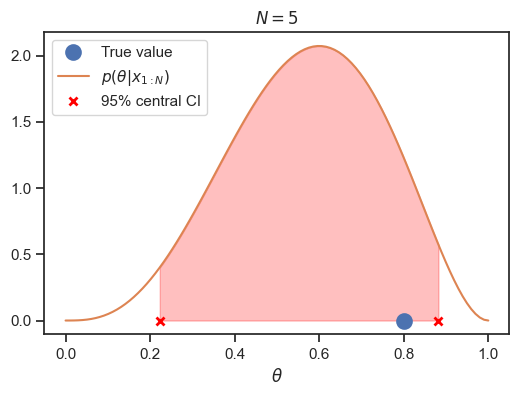

In [4]:
fig, ax = plt.subplots()
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value'
)
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
thetas_int = np.linspace(theta_low, theta_up, 100)
ax.fill_between(
    thetas_int,
    np.zeros(thetas_int.shape),
    Theta_post.pdf(thetas_int),
    color='red',
    alpha=0.25
)
ax.plot(
    [theta_low, theta_up],
    np.zeros((2,)),
    'x',
    color='red',
    markeredgewidth=2,
    label='95% central CI'
)
ax.set_xlabel(r'$\theta$')
ax.set_title(f'$N={N}$')
plt.legend(loc='best');

So, is there another 95\% credible interval?
Yes there is. You can find it by solving thes problem:

$$
p(\theta \le \ell | x_{1:N}) = 0.01,
$$

and

$$
p(\theta \le u | x_{1:N}) = 0.96,
$$

for $\ell$ and $u$, respectively.
Here is what you will find for the coin toss example.

In [5]:
theta_low_o = Theta_post.ppf(0.01)
theta_up_o = Theta_post.ppf(0.96)
print(f'Theta is in [{theta_low_o:.2f}, {theta_up_o:1.2f}] with 95% probability')

Theta is in [0.17, 0.86] with 95% probability


And here is how it compares to the previous one:

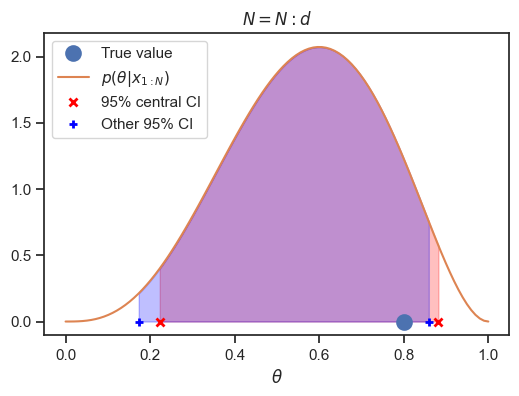

In [6]:
fig, ax = plt.subplots()
ax.plot(
    [theta_true],
    [0.0],
    'o',
    markeredgewidth=2,
    markersize=10,
    label='True value'
)
ax.plot(
    thetas,
    Theta_post.pdf(thetas),
    label=r'$p(\theta|x_{1:N})$'
)
thetas_int = np.linspace(theta_low, theta_up, 100)
ax.fill_between(
    thetas_int,
    np.zeros(thetas_int.shape),
    Theta_post.pdf(thetas_int),
    color='red',
    alpha=0.25
)
ax.plot(
    [theta_low, theta_up],
    np.zeros((2,)),
    'x',
    color='red', 
    markeredgewidth=2,
    label='95% central CI'
)
thetas_int_o = np.linspace(theta_low_o, theta_up_o, 100)
ax.fill_between(
    thetas_int_o,
    np.zeros(thetas_int_o.shape),
    Theta_post.pdf(thetas_int_o),
    color='blue',
    alpha=0.25
)
ax.plot(
    [theta_low_o, theta_up_o],
    np.zeros((2,)),
    '+',
    color='blue',
    markeredgewidth=2,
    label='Other 95% CI'
)
ax.set_xlabel(r'$\theta$')
ax.set_title(r'$N={N:d}$')
plt.legend(loc='best');

### Getting Credible Intervals when the Posterior is not Analytically Available
Of course many times you do not have the posterior in analytical form and you have to estimate the credible intervals via sampling.
We will learn about this in a later lecture.

## Questions
+ Find the credible interval for $\theta$ conditioned on the data with 99\% accuracy.
+ How many coin tosses do you have to do, in order to estimate $\theta$ within an accuracy of $1\%$ with $99\%$ probability? Do not try to do this analytically. Just experiment with different values of $N$ for this synthetic example. Getting a number $N$ that works for all possible datasets (assuming that the model is correct), is an interesting problem but it is not trivial.